In [1]:
import pandas as pd

In [2]:
data_dir = './data/trial3/'

In [3]:
df = pd.read_csv(data_dir+'driving_log.csv', names=['center_cam', 'left_cam', 'right_cam', 'steering', 'throttle', 'brake', 'speed'])

In [4]:
df.head()

,center_cam,left_cam,right_cam,steering,throttle,brake,speed
0,D:\Documents\Udacity\Self-Driving Car Engineer...,D:\Documents\Udacity\Self-Driving Car Enginee...,D:\Documents\Udacity\Self-Driving Car Enginee...,0.0,0.0,0.0,0.000082
1,D:\Documents\Udacity\Self-Driving Car Engineer...,D:\Documents\Udacity\Self-Driving Car Enginee...,D:\Documents\Udacity\Self-Driving Car Enginee...,0.0,0.0,0.0,0.000078
2,D:\Documents\Udacity\Self-Driving Car Engineer...,D:\Documents\Udacity\Self-Driving Car Enginee...,D:\Documents\Udacity\Self-Driving Car Enginee...,0.0,0.0,0.0,0.000082
3,D:\Documents\Udacity\Self-Driving Car Engineer...,D:\Documents\Udacity\Self-Driving Car Enginee...,D:\Documents\Udacity\Self-Driving Car Enginee...,0.0,0.0,0.0,0.000078
4,D:\Documents\Udacity\Self-Driving Car Engineer...,D:\Documents\Udacity\Self-Driving Car Enginee...,D:\Documents\Udacity\Self-Driving Car Enginee...,0.0,0.0,0.0,0.000079


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   center_cam  3988 non-null   object 
 1   left_cam    3988 non-null   object 
 2   right_cam   3988 non-null   object 
 3   steering    3988 non-null   float64
 4   throttle    3988 non-null   float64
 5   brake       3988 non-null   float64
 6   speed       3988 non-null   float64
dtypes: float64(4), object(3)
memory usage: 218.2+ KB


In [6]:
df_clean = df.copy()

In [7]:
df_clean.iloc[:,0:3] = df_clean.iloc[:,0:3].apply(lambda x: data_dir + 'IMG/' + x.str.split('\\').str[-1])

In [8]:
df_clean.head()

,center_cam,left_cam,right_cam,steering,throttle,brake,speed
0,./data/trial3/IMG/center_2021_01_06_19_41_25_4...,./data/trial3/IMG/left_2021_01_06_19_41_25_443...,./data/trial3/IMG/right_2021_01_06_19_41_25_44...,0.0,0.0,0.0,0.000082
1,./data/trial3/IMG/center_2021_01_06_19_41_25_5...,./data/trial3/IMG/left_2021_01_06_19_41_25_546...,./data/trial3/IMG/right_2021_01_06_19_41_25_54...,0.0,0.0,0.0,0.000078
2,./data/trial3/IMG/center_2021_01_06_19_41_25_6...,./data/trial3/IMG/left_2021_01_06_19_41_25_649...,./data/trial3/IMG/right_2021_01_06_19_41_25_64...,0.0,0.0,0.0,0.000082
3,./data/trial3/IMG/center_2021_01_06_19_41_25_7...,./data/trial3/IMG/left_2021_01_06_19_41_25_752...,./data/trial3/IMG/right_2021_01_06_19_41_25_75...,0.0,0.0,0.0,0.000078
4,./data/trial3/IMG/center_2021_01_06_19_41_25_8...,./data/trial3/IMG/left_2021_01_06_19_41_25_857...,./data/trial3/IMG/right_2021_01_06_19_41_25_85...,0.0,0.0,0.0,0.000079


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [10]:
images = []
measurements = []

In [11]:
df_clean['center_cam'].apply(lambda x: images.append(mpimg.imread(x)));
df_clean['steering'].apply(lambda x: measurements.append(x));

In [12]:
steering_offset = 0.02
# Left Camera Modifications
df_clean['left_cam'].apply(lambda x: images.append(mpimg.imread(x)));
df_clean['steering'].apply(lambda x: measurements.append(x + steering_offset));
# Right Camera Modifications
df_clean['right_cam'].apply(lambda x: images.append(mpimg.imread(x)));
df_clean['steering'].apply(lambda x: measurements.append(x - steering_offset));

In [13]:
import numpy as np

In [14]:
X_train = np.array(images)
y_train = np.array(measurements)

# Training

In [15]:
import tensorflow as tf

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense, Conv2D, MaxPool2D, Dropout, Cropping2D  

In [17]:
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [18]:
X_train.shape

(11964, 160, 320, 3)

In [19]:
# model = Sequential()
# model.add(Flatten(input_shape=(160,320,3)))
# model.add(Dense(1))

In [20]:
import cv2

In [21]:
modified_images = []

In [22]:
scale_percent = 80 # percent of original size
width = int(X_train[0].shape[1] * scale_percent / 100)
height = int(X_train[0].shape[0] * scale_percent / 100)
dim = (width, height)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
for image in X_train:
    normalized = image.copy()
    normalized[:,:,0] = clahe.apply(normalized[:,:,0])
    normalized[:,:,1] = clahe.apply(normalized[:,:,1])
    normalized[:,:,2] = clahe.apply(normalized[:,:,2])
    grayscale = cv2.cvtColor(normalized, cv2.COLOR_RGB2GRAY)
    downscaled = cv2.resize(grayscale, dim, interpolation=cv2.INTER_AREA)
    modified_images.append(downscaled)
    # # Also flip the image
    # modified_images.append(cv2.flip(downscaled, 1))
# plt.imshow(cv2.resize(X_train[0], dim, interpolation=cv2.INTER_AREA))

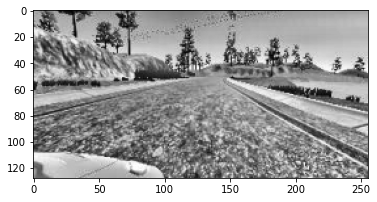

In [23]:
plt.imshow(modified_images[-1], cmap='gray')

In [24]:
# plt.imshow(cv2.flip(modified_images[-1],1), cmap='gray')

In [25]:
X_train_modified = np.array(modified_images)
# Adding a dimension for Keras processing purposes
X_train_modified = np.expand_dims(X_train_modified, 3)
# y_train_modified = np.concatenate([measurements, np.multiply(measurements, -1.0)])

In [26]:
tf.keras.backend.clear_session()

In [27]:
model = Sequential()
# Input Layer
model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(height, width, 1)))
model.add(Cropping2D(cropping=((40,10),(0,0))))
# model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(160,320,1)))
# Convolution 1
model.add(Conv2D(24, (5,5), strides=(2,2), activation='relu'))
model.add(MaxPool2D(strides=(1,1)))
# Convolution 2
model.add(Conv2D(36, (5,5), strides=(2,2), activation='relu'))
model.add(MaxPool2D(strides=(1,1)))
# Convolution 3
model.add(Conv2D(48, (5,5), strides=(2,2), activation='relu'))
# model.add(MaxPool2D(strides=(1,1)))
# Convolution 4
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(strides=(1,1)))
# Convolution 5
model.add(Conv2D(64, (3,3), activation='relu'))
# Flatten and Dropout
model.add(Flatten())
model.add(Dropout(0.25))
# Fully Connected 1
model.add(Dense(400, activation='relu'))
# Fully Connected 2
model.add(Dense(100, activation='relu'))
# Fully Connected 3 with Dropout
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
# Output
model.add(Dense(1));

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 128, 256, 1)       0         
_________________________________________________________________
cropping2d (Cropping2D)      (None, 78, 256, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 37, 126, 24)       624       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 125, 24)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 61, 36)        21636     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 60, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 28, 48)         4

In [29]:
# model.compile(loss='mse', optimizer='adam')
# history = model.fit(X_train_modified, y_train, epochs=1, batch_size=256, validation_split=0.2, shuffle=True)

In [30]:
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs\\fit\\"
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [31]:
stopper = EarlyStopping(monitor='val_loss', min_delta=0.0003, patience=5)

In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_modified, y_train, epochs=30, batch_size=256, validation_split=0.2, shuffle=True, callbacks=[tensorboard_callback, stopper])

Train on 9571 samples, validate on 2393 samples
Epoch 1/30
9571/9571 [==============================] - 12s 1ms/sample - loss: 0.0104 - acc: 0.1576 - val_loss: 0.0098 - val_acc: 0.0000e+00
Epoch 2/30
9571/9571 [==============================] - 11s 1ms/sample - loss: 0.0064 - acc: 0.1576 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 3/30
9571/9571 [==============================] - 12s 1ms/sample - loss: 0.0056 - acc: 0.1576 - val_loss: 0.0084 - val_acc: 0.0000e+00
Epoch 4/30
9571/9571 [==============================] - 11s 1ms/sample - loss: 0.0053 - acc: 0.1576 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 5/30
9571/9571 [==============================] - 11s 1ms/sample - loss: 0.0048 - acc: 0.1576 - val_loss: 0.0078 - val_acc: 0.0000e+00
Epoch 6/30
9571/9571 [==============================] - 11s 1ms/sample - loss: 0.0045 - acc: 0.1576 - val_loss: 0.0072 - val_acc: 0.0000e+00
Epoch 7/30
9571/9571 [==============================] - 11s 1ms/sample - loss: 0.0040 - acc: 0.1576 - val_

In [33]:
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
# history = model.fit(X_train_modified, y_train, epochs=100, batch_size=200, validation_split=0.2, shuffle=True, callbacks=[tensorboard_callback, stopper])

In [34]:
model.save('model.h5')

In [35]:
# from tensorflow.keras.models import load_model

In [36]:
# model = load_model('model.h5')

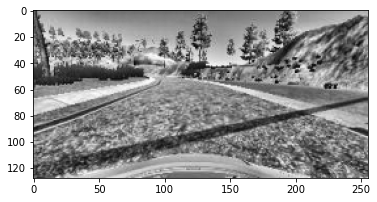

In [37]:
plt.imshow(X_train_modified[100], cmap='gray')

In [44]:
y_train[300]

0.0

In [43]:
model.predict(np.expand_dims(X_train_modified[300], axis=0))

array([[-0.01669641]], dtype=float32)

In [40]:
# %run drive.py model.h5